# Asignment 1

# Bresenham's Line Drawing Algorithm

This algorithm is used to draw a line between two points on a grid. This is very optimized for the following reasons:
- It does not do floating point operation
- it does not do division or multiplication
- it do not round the values

In [113]:
# importing neccessary libraries

import matplotlib.pyplot as plt
import numpy as np

In [114]:
# creating an empty list of x and y coordinates
x = []
y = []

In [115]:
def plot_points(x, y):
    # Calculate grid dimensions
    n = max(x) + 1
    m = max(y) + 1

    # Create a grid
    grid = np.zeros((n, m))

    # Fill the cells corresponding to (x, y) coordinates
    for xi, yi in zip(x, y):
        grid[xi, yi] = 1

    # Plot the grid
    plt.imshow(grid, cmap='Blues', origin='lower', extent=[0, m, 0, n], alpha=0.7)

    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Grid with Filled Cells at (X, Y) Coordinates')

    # Adding grid
    plt.grid(True, color='black', linewidth=1, linestyle='--')

    # Show the plot
    plt.show()

### Defining the bresenham's algo

In [116]:
def bresenhams_line(x1, y1, x2, y2):    

    # clearing the lists
    x = []
    y = []

    # calculating the difference between the two points
    dx = x2 - x1
    dy = y2 - y1

    # initial value of the decision parameter
    d = 2*dy - dx
    
    # increment used for the East direction
    dE = 2*dy

    # increment used for the North-East direction
    dNE = 2*(dy - dx)

    # appending the first point to the list
    x.append(x1)
    y.append(y1)

    # initial value of the y-coordinate
    yk = y1

    for xk in range(x1, x2):
        
        # checking the decision parameter
        if d < 0:
            # if the decision parameter is less than 0, the next point is (xk+1, yk)
            d = d + dE
        else:
            # if the decision parameter is greater than or equal to 0, the next point is (xk+1, yk+1)
            d = d + dNE
            yk = yk + 1

        # appending the new points to the list
        x.append(xk+1)
        y.append(yk)

    # plotting the points
    plot_points(x, y)
    

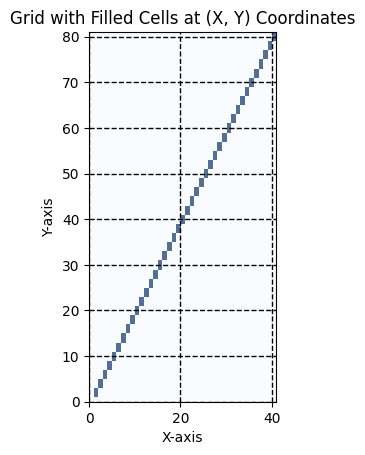

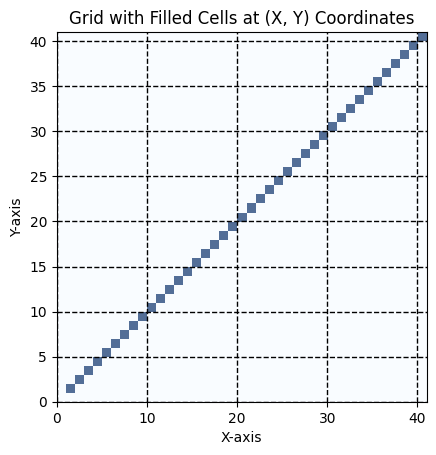

In [117]:
br_line = bresenhams_line(1, 1, 80, 40)
br_line = bresenhams_line(1, 1, 40, 80)

In [118]:
def bresenhams_line(x1, y1, x2, y2):

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    slope = dy / float(dx)

    # if the slope is greater than 1, swap the x and y coordinates
    if slope > 1:
        x1, y1 = y1, x1
        x2, y2 = y2, x2

    # if the second point is to the left of the first point, swap the points
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    # clearing the lists
    x = []
    y = []

    # calculating the difference between the two points
    dx = x2 - x1
    dy = y2 - y1

    # initial value of the decision parameter
    d = 2*dy - dx
    
    # increment used for the East direction
    dE = 2*dy

    # increment used for the North-East direction
    dNE = 2*(dy - dx)

    # appending the first point to the list
    x.append(x1)
    y.append(y1)

    # initial value of the y-coordinate
    yk = y1

    for xk in range(x1, x2):
        
        # checking the decision parameter
        if d < 0:
            # if the decision parameter is less than 0, the next point is (xk+1, yk)
            d = d + dE
        else:
            # if the decision parameter is greater than or equal to 0, the next point is (xk+1, yk+1)
            d = d + dNE
            yk = yk + 1

        # appending the new points to the list
        x.append(xk+1)
        y.append(yk)

    # if the slope is greater than 1, the x and y coordinates are swapped
    if slope <= 1:
        x, y = y, x

    # plotting the points
    plot_points(x, y)
    

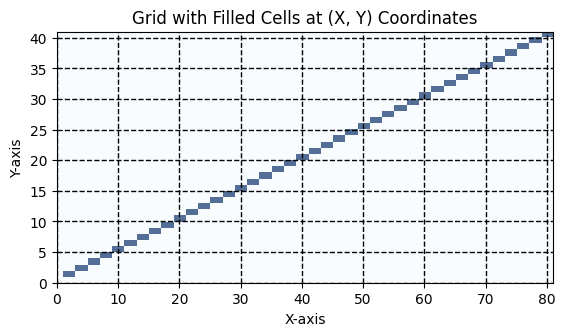

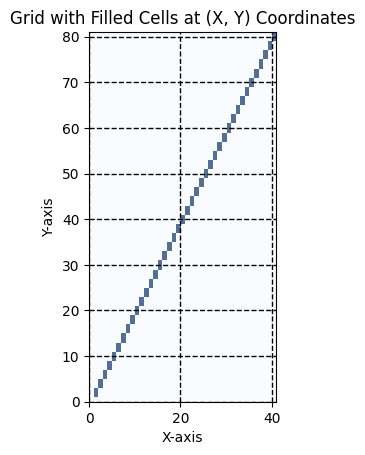

In [119]:
br_line = bresenhams_line(1, 1, 80, 40)
br_line = bresenhams_line(1, 1, 40, 80)